### We have an e commerce  dataset which contains customer details like email,address,avg session length,time on app and the yearly amount spend. We will build a predictive model which will predict the yearly amount spend by each customer,given the customer information. this information can be used to give customers personalized offers or loyalty memberships,etc.

In [1]:
##necessary imports:
import numpy as np
import pandas as pd
from matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv('Ecommerce Customers.csv')
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
dataset.describe() ###summary stats of each numeric variables.

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
dataset.shape

(500, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
#### mean is a representative of all values when data is symmetric around mean,and median is used as a representative
#### of a collecion of values,when the data is asymmetric.


In [7]:
dataset.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

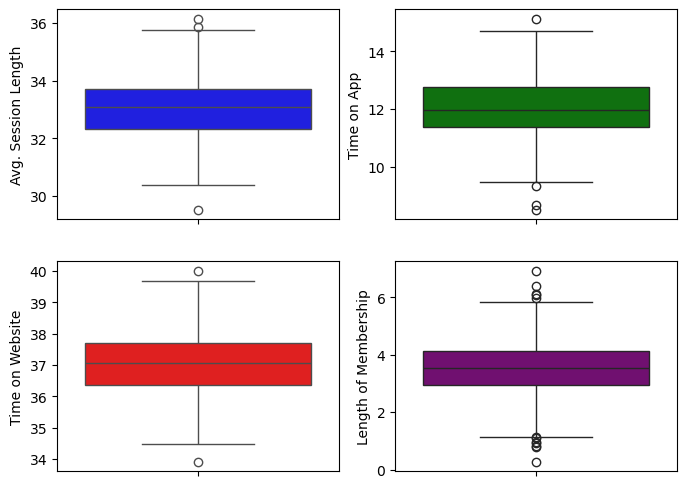

In [8]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,6))
####default plotting area is 6.4 inches and 4.8 inches
plt1=sns.boxplot(dataset['Avg. Session Length'],color='b',ax=axes[0][0])
plt2=sns.boxplot(dataset['Time on App'],color='g',ax=axes[0][1])
plt3=sns.boxplot(dataset['Time on Website'],color='r',ax=axes[1][0])
plt4=sns.boxplot(dataset['Length of Membership'],color='purple',ax=axes[1][1])
plt.show()

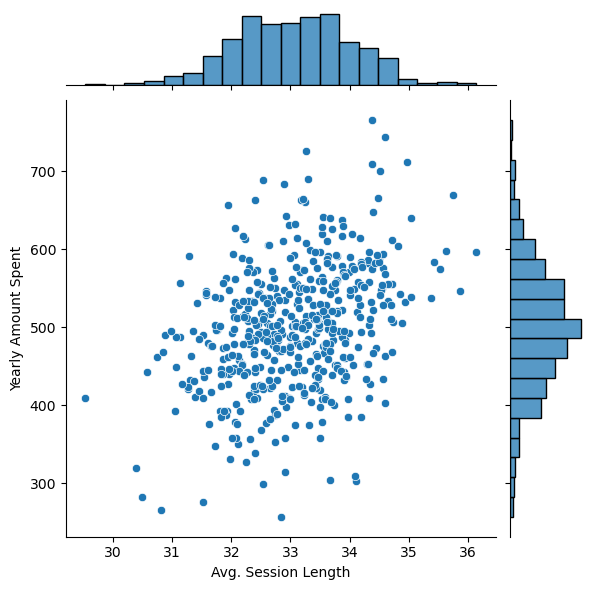

In [9]:
###bivariate

sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=dataset)
plt.show()

In [10]:
#### As we notice a fairly positive relationship between the session length and the yearly amount spent,we can use 
#### the avg session length as a predictor of yearly amount spent(y)

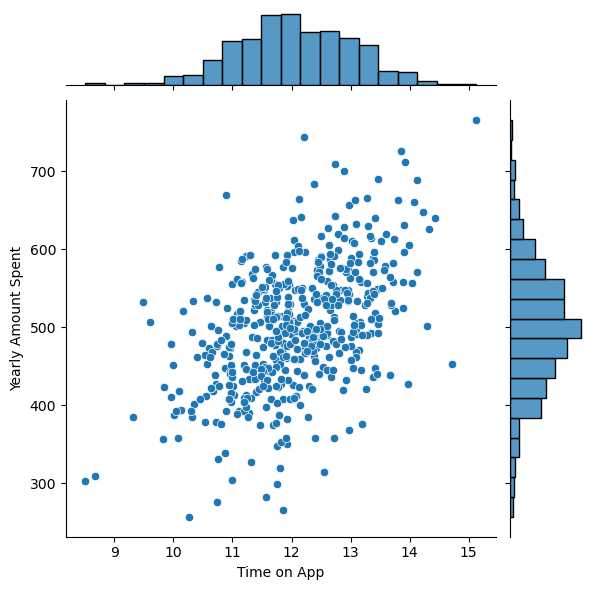

In [11]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=dataset)
plt.show()

In [12]:
##time on app is a better predictor than the avg session length.

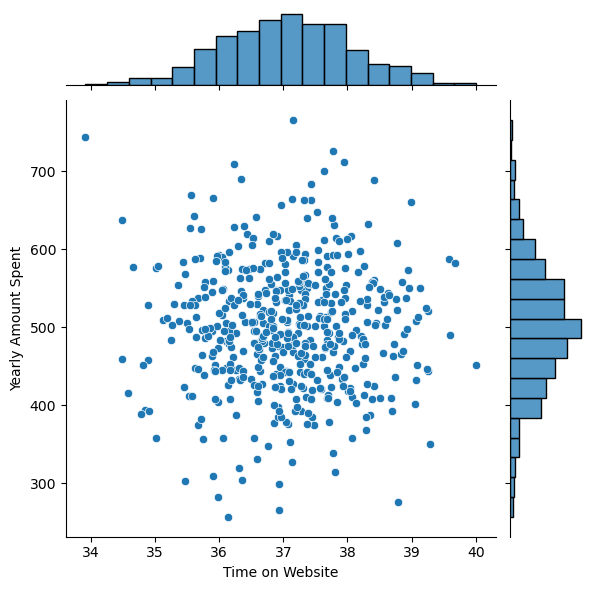

In [13]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=dataset)
plt.show()

In [14]:
### Time on website is a weak predictor of the yearly amount spent

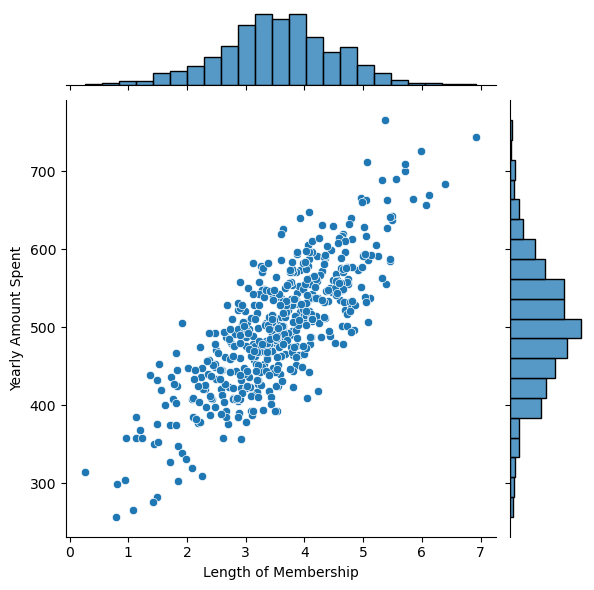

In [15]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=dataset)
plt.show()

In [16]:
##### Length of membership has the strongest positive relationship with the DV.

In [17]:
dataset.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8452\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


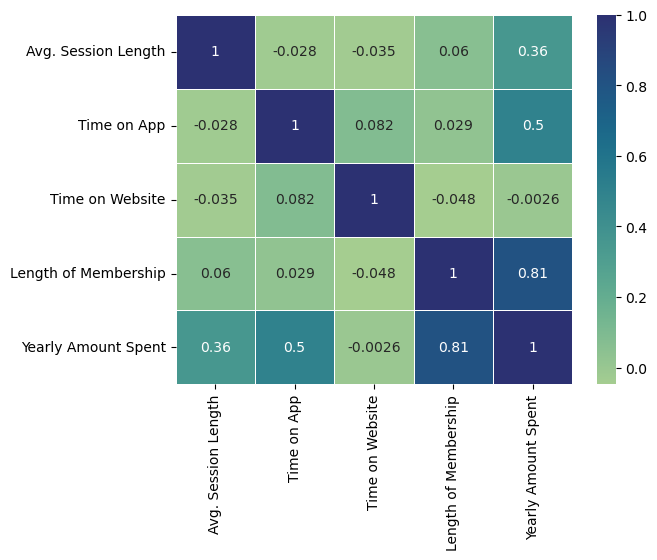

In [18]:
#### visualising the above results:
sns.heatmap(dataset.corr(numeric_only=True),linewidth=0.4,annot=True,cmap='crest')
plt.show()

In [19]:
dataset.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
#### splitting the data into feature set and dependent variable set:
X=dataset[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=dataset['Yearly Amount Spent']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [23]:
mlr.coef_

array([25.8466897 , 38.81582825,  0.20191541, 61.74820022])

In [24]:
mlr.intercept_

-1048.3289680245878

In [25]:
predictions=mlr.predict(X_test)

In [26]:
predictions

array([438.38828993, 489.87912877, 370.64151577, 514.37404963,
       496.32026503, 451.29279839, 458.06660753, 336.89276993,
       528.25388182, 663.31704278, 559.74505053, 526.08403059,
       552.2666673 , 457.34723714, 450.32757843, 432.07243558,
       563.49098202, 408.83311971, 599.61369349, 486.97464621,
       716.28720652, 496.96707494, 411.71628067, 556.29816291,
       551.32361174, 398.40552149, 421.3192807 , 395.6763062 ,
       548.32209658, 463.59145823, 558.49053354, 505.31208848,
       505.85283789, 464.06854533, 425.97536477, 401.03979978,
       503.80451158, 430.54260512, 570.00202003, 422.07929224,
       487.66473058, 602.27337836, 616.11566136, 589.29672921,
       449.9893809 , 380.10689082, 558.50487097, 462.99820434,
       502.29871803, 401.49519991, 524.32671862, 416.85563469,
       576.68875978, 478.2795989 , 457.25927104, 397.8735013 ,
       564.86367172, 305.40669074, 562.49057886, 476.83985037,
       498.89242109, 434.2497342 , 464.52456142, 577.13

In [28]:
y_test

90     449.070319
254    482.602467
283    374.269675
445    513.153112
461    502.771075
          ...    
430    556.186369
49     416.358354
134    407.804031
365    594.274483
413    493.181261
Name: Yearly Amount Spent, Length: 125, dtype: float64

In [29]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,predictions)
print(r2)

0.985105078879716


In [30]:
mean_squared_error=np.mean((y_test-predictions)**2)
mean_squared_error

96.38538562160679